# ASSIGNMENT_17

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db_path = "database (1).sqlite"
conn = sqlite3.connect(db_path)

In [3]:
conn

In [4]:
def q(query):
    return pd.read_sql_query(query, conn)

# 1. Top 10 highest paid employees (TotalPayBenefits)

In [40]:
top_10_paid = q("""select employeename, jobtitle, totalpaybenefits from salaries
order by totalpaybenefits desc
limit 10
""")

In [41]:
top_10_paid

,EmployeeName,JobTitle,TotalPayBenefits
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,David Shinn,Deputy Chief 3,510732.68
2,Amy P Hart,Asst Med Examiner,479652.21
3,William J Coaker Jr.,Chief Investment Officer,436224.36
4,Gregory P Suhr,Chief of Police,425815.28
5,Joanne M Hayes-White,"Chief, Fire Department",422353.40
6,Gregory P Suhr,Chief of Police,418019.22
7,Joanne M Hayes-White,"Chief, Fire Department",417435.10
8,Ellen G Moffatt,Asst Med Examiner,415767.94
9,Gary Altenberg,"Lieutenant, Fire Suppression",407274.78


# 2. Year with missing JobTitle data

In [42]:
missing_jobtitle = q("""select year, count(*) as missingcount from salaries
where jobtitle in ('not provided', 'Not Provided')
group by year
order by year
""")

In [43]:
missing_jobtitle

,Year,missingcount


# 3. Number of unique agencies

In [44]:
unique_agencies = q("""select count(distinct agency) as uniqueagencies
from salaries
""")

In [45]:
unique_agencies

,uniqueagencies
0,1


# 4. Average BasePay, OvertimePay, TotalPay for 2011

In [46]:
avg_pay_2011 = q("""select avg(basepay) as avgbasepay, avg(overtimepay) as avgovertimepay, avg(totalpay) as avgtotalpay from salaries
where year = 2011
""")

In [47]:
avg_pay_2011

,avgbasepay,avgovertimepay,avgtotalpay
0,63593.401894,4524.411277,71992.050063


# 5. Plot Top 10 Job Titles by TotalPay in 20

In [52]:
top_jobs_2014 = q("""SELECT JobTitle, SUM(TotalPay) AS TotalPay
FROM salaries
WHERE Year = 2014
GROUP BY JobTitle
ORDER BY TotalPay DESC
LIMIT 10
""")

In [53]:
top_jobs_2014

,JobTitle,TotalPay
0,Transit Operator,1.520080e+08
1,Registered Nurse,1.444065e+08
2,Firefighter,1.132836e+08
3,Police Officer 3,1.065347e+08
4,Deputy Sheriff,7.108394e+07
5,Sergeant 3,6.084374e+07
6,Attorney (Civil/Criminal),5.312390e+07
7,Police Officer,5.132217e+07
8,Special Nurse,4.949874e+07
9,Police Officer 2,4.631872e+07


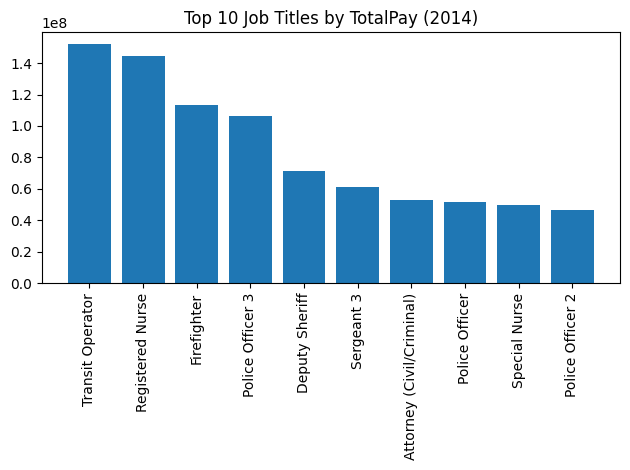

In [55]:
plt.figure()
plt.bar(top_jobs_2014["JobTitle"], top_jobs_2014["TotalPay"])
plt.xticks(rotation=90)
plt.title("Top 10 Job Titles by TotalPay (2014)")
plt.tight_layout()
plt.show()

# 6. Job titles with OvertimePay > 150,000

In [38]:
high_overtime = q("""SELECT DISTINCT JobTitle, OvertimePay FROM salaries
WHERE OvertimePay > 150000
AND JobTitle NOT IN ('Not Provided', 'Not provided')
ORDER BY OvertimePay DESC
""")

In [39]:
high_overtime

,JobTitle,OvertimePay
0,"Lieutenant, Fire Suppression",220909.48
1,Deputy Sheriff,196689.18
2,EMT/Paramedic/Firefighter,192424.49
3,Deputy Sheriff,173547.73
4,Deputy Sheriff,173178.23
5,Deputy Sheriff,169659.92
6,"Lieutenant, Fire Suppression",163477.81
7,Firefighter,160418.47
8,Deputy Sheriff,156077.49


# 7. Employees with job titles containing 'CHIEF'

In [18]:
chief_employees = q("""SELECT EmployeeName, JobTitle FROM salaries
WHERE JobTitle LIKE '%CHIEF%'
""")

In [19]:
chief_employees

,EmployeeName,JobTitle
0,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
1,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II
2,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)"
3,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)"
4,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...,...
622,Sharon C Jackson,Chief Deputy Adlt Probation Of
623,Anita S Lee,Chief Clerk
624,George D Vaughan,Chief Nursery Specialist
625,Patrick W Gillespie,Chief Preparator


# 8. Count employees with 'ENGINEER' or 'Fire' in 2012 & 2013

In [56]:
engineer_fire_count = q("""SELECT Year, COUNT(*) AS EmployeeCount FROM salaries
WHERE (JobTitle LIKE '%ENGINEER%' OR JobTitle LIKE '%Fire%')
AND Year IN (2012, 2013)
GROUP BY Year
ORDER BY Year
""")

In [57]:
engineer_fire_count

,Year,EmployeeCount
0,2012,2463
1,2013,2506


# 9. Distinct job titles starting with 'CAPTAIN'

In [58]:
captain_titles = q("""SELECT DISTINCT JobTitle FROM salaries
WHERE JobTitle LIKE 'CAPTAIN%'
ORDER BY JobTitle
""")

In [59]:
captain_titles

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
2,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
3,"CAPTAIN, FIRE SUPPRESSION"
4,Captain 3
5,"Captain, (Fire Department)"
6,"Captain, Emergency Med Svcs"
7,"Captain, Fire Suppression"


# 10. Employees with BasePay > 50k & TotalPay < 150k

In [60]:
filtered_employees = q("""SELECT EmployeeName, JobTitle, BasePay, TotalPay FROM salaries
WHERE BasePay > 50000
AND TotalPay < 150000
AND JobTitle NOT IN ('Not Provided', 'Not provided')
ORDER BY TotalPay DESC
""")

In [61]:
filtered_employees

,EmployeeName,JobTitle,BasePay,TotalPay
0,Kevin Salas,Firefighter,110847.11,149989.01
1,Augustine W Cheung,Transit Supervisor,87955.38,149988.30
2,JAY DOWKE,POLICE OFFICER III,112380.37,149987.24
3,Delene Wolf,Dept Head I,146497.5,149983.50
4,Hernan R Villalobos,Police Officer 2,116584,149981.35
...,...,...,...,...
87255,Cathie L Serletic,Clerk Typist,,0.00
87256,Jasmine M Romero,Assistant Recreation Director,,0.00
87257,Timothy E Gibson,Police Officer 3,,0.00
87258,Mark E Laherty,Police Officer 3,,0.00


In [62]:
conn.close()